In [1]:
import os
import sys

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms
from torchvision.datasets import ImageFolder

from PIL import Image

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from random import randint

from ultralytics import YOLO

In [2]:
from utils import EmotionClassifier

In [3]:
emotions = [
    'angry',
    'disgust',
    'fear',
    'happy',
    'neutral',
    'sad',
    'surprise'
]

In [4]:
classifier = EmotionClassifier()
classifier.eval()

/opt/anaconda3/envs/unet/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/envs/unet/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EmotionClassifier(
  (resnet): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Co

In [5]:
state_dict = torch.load('model.pth', map_location=torch.device('cpu'))
classifier.load_state_dict(state_dict)

<All keys matched successfully>

In [6]:
model = YOLO('./yolov11n-face.pt')

In [7]:
results = model('./image.png')


image 1/1 /Users/heliaea/Programming/Assignments/ICS5200/image.png: 640x608 36 faces, 66.2ms
Speed: 4.0ms preprocess, 66.2ms inference, 6.5ms postprocess per image at shape (1, 3, 640, 608)


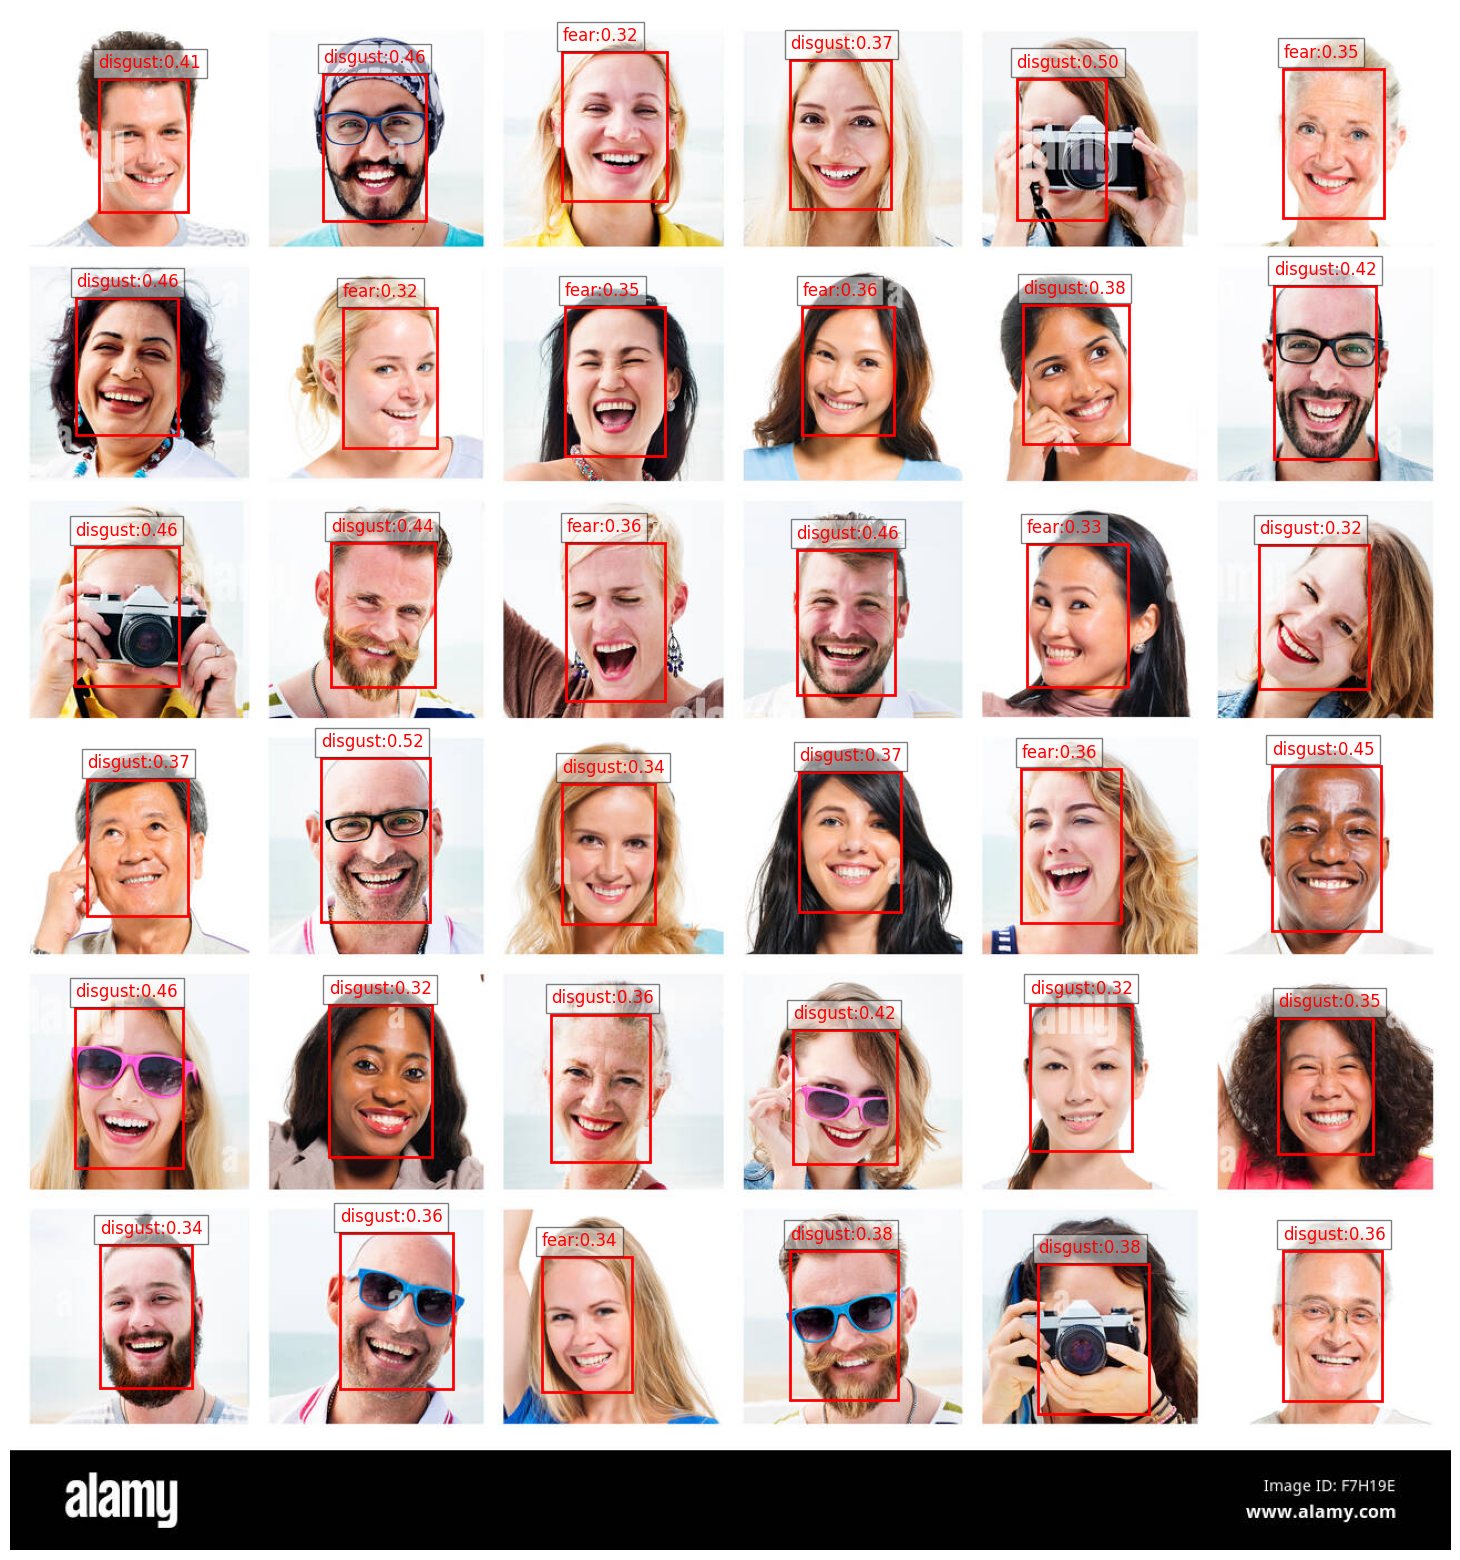

In [8]:
# Load and display the image
plt.figure(figsize=(20, 20))
img = Image.open("./image.png")
plt.imshow(img)

# Plot each bounding box
for ann in results[0].boxes:
    # Extract information from annotation
    cls = model.names[ann.cls.item()]  # class name
    conf = ann.conf.item()  # confidence score
    x1, y1, x2, y2 = ann.xyxy[0].tolist()  # bounding box coordinates

    # Draw the bounding box
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor="red", linewidth=2, fill=False)
    plt.gca().add_patch(rect)

    # Predict emotion
    cropped_img = img.crop((x1, y1, x2, y2))
    # Convert to grayscale
    cropped_img = cropped_img.convert("L")
    transform = transforms.ToTensor()
    cropped_img_tensor = transform(cropped_img)
    output = classifier(cropped_img_tensor.unsqueeze(0))
    _, predicted = torch.max(output.data, 1)
    pred_conf = output[0][predicted].item()

    plt.text(x1, y1 - 10, f'{emotions[predicted.item()]}:{pred_conf:.2f}', color="red", fontsize=12, bbox=dict(facecolor="white", alpha=0.5))

# Show the image with bounding boxes
plt.axis("off")  # Hide axes
plt.show()